In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading data

df = pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [9]:
#Finding Missing Values

print(df.isnull().sum)

<bound method DataFrame.sum of       show_id   type  title  director   cast  country  date_added  \
0       False  False  False     False   True    False       False   
1       False  False  False      True  False    False       False   
2       False  False  False     False  False     True       False   
3       False  False  False      True   True     True       False   
4       False  False  False      True  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8802    False  False  False     False  False    False       False   
8803    False  False  False      True   True     True       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
0            False   False     False      False        False  
1            F

In [10]:
#Cleaning Data

df.dropna(subset=['type','director','cast','country','date_added','release_year','rating','duration','listed_in','description'], inplace=True)
print(df.isnull().sum)

<bound method DataFrame.sum of       show_id   type  title  director   cast  country  date_added  \
7       False  False  False     False  False    False       False   
8       False  False  False     False  False    False       False   
9       False  False  False     False  False    False       False   
12      False  False  False     False  False    False       False   
24      False  False  False     False  False    False       False   
...       ...    ...    ...       ...    ...      ...         ...   
8801    False  False  False     False  False    False       False   
8802    False  False  False     False  False    False       False   
8804    False  False  False     False  False    False       False   
8805    False  False  False     False  False    False       False   
8806    False  False  False     False  False    False       False   

      release_year  rating  duration  listed_in  description  
7            False   False     False      False        False  
8            F

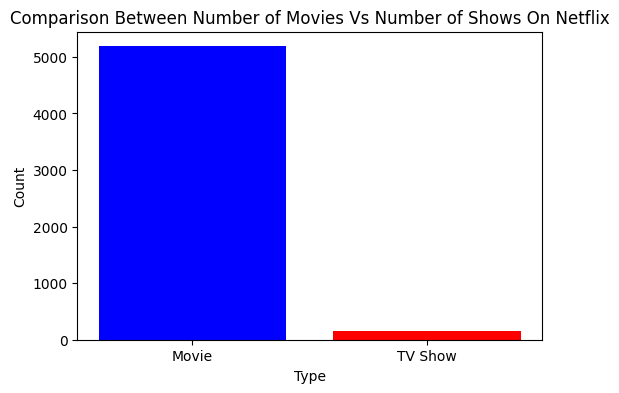

In [27]:
#Comperison Between Number of Movies Vs Number of Shows On Netflix Using Bar

type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=['blue', 'Red'])
plt.title('Comparison Between Number of Movies Vs Number of Shows On Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.savefig("Comparison Between Number of Movies Vs Number of Shows on Netflix Bar.png")
plt.show()

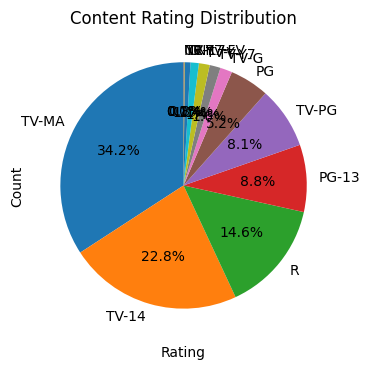

In [20]:
#Finding content Rating Distribution using Pie Chart

rating_count = df['rating'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig("Content Rating Distribution Pie.png")
plt.show()

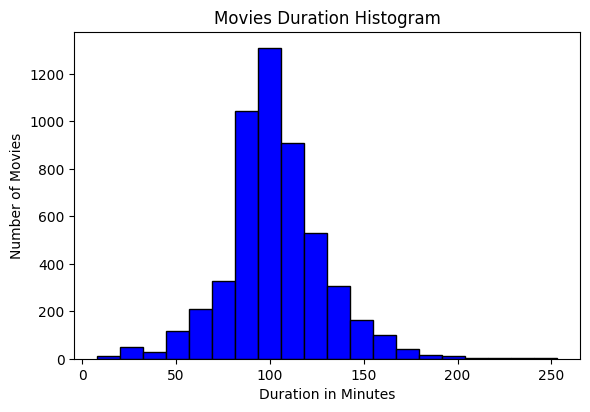

In [31]:
#Finding Movies Duration using Histogram

movie_duration = df[df['type'] == 'Movie'].copy()
movie_duration['duration_int'] = movie_duration['duration'].str.replace('min','').astype(int)
plt.figure(figsize=(6,4))
plt.hist(movie_duration['duration_int'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Duration in Minutes')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.title('Movies Duration Histogram')
plt.savefig("Movies Duration Histogram.png")
plt.show()

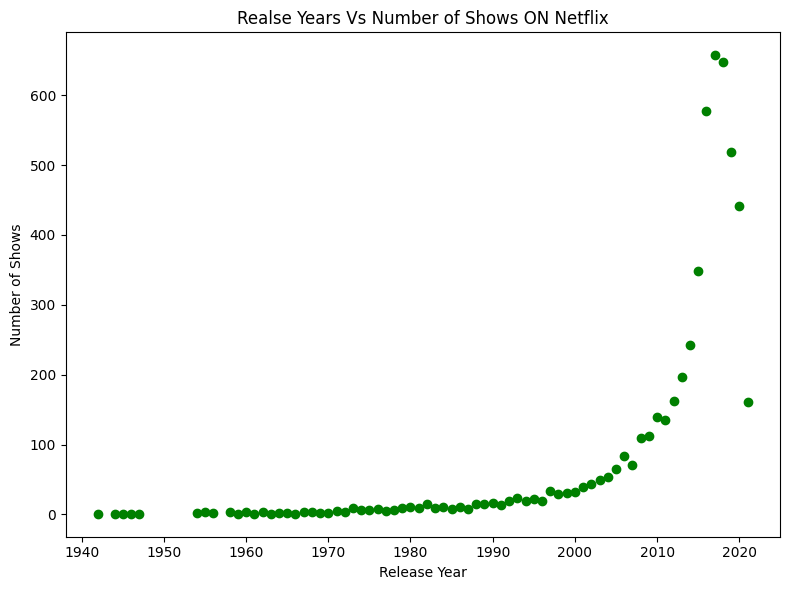

In [32]:
#Visualizing Release Years Vs Number of Shows ON Netflix Using Scatterplot

release_year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(8,6))
plt.scatter(release_year_count.index, release_year_count.values, color='green')
plt.title("Realse Years Vs Number of Shows ON Netflix")
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig("Realse Years Vs Number of Shows ON Netflix Scatter.png")
plt.show()

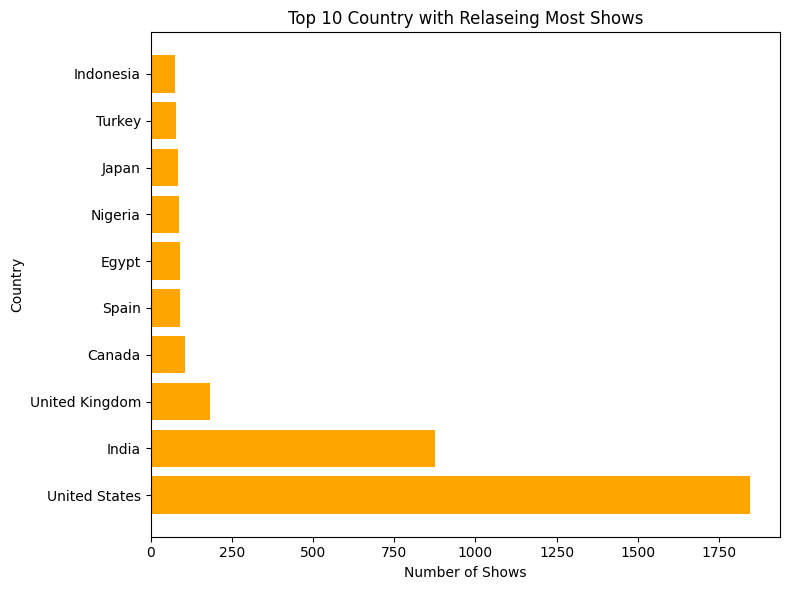

In [34]:
#Showing Top 10 Country with Relaseing Most shows

country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(country_count.index, country_count.values, color='orange')
plt.title("Top 10 Country with Relaseing Most Shows")
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("Top 10 Country with Relaseing Most Shows hBar.png")
plt.show()

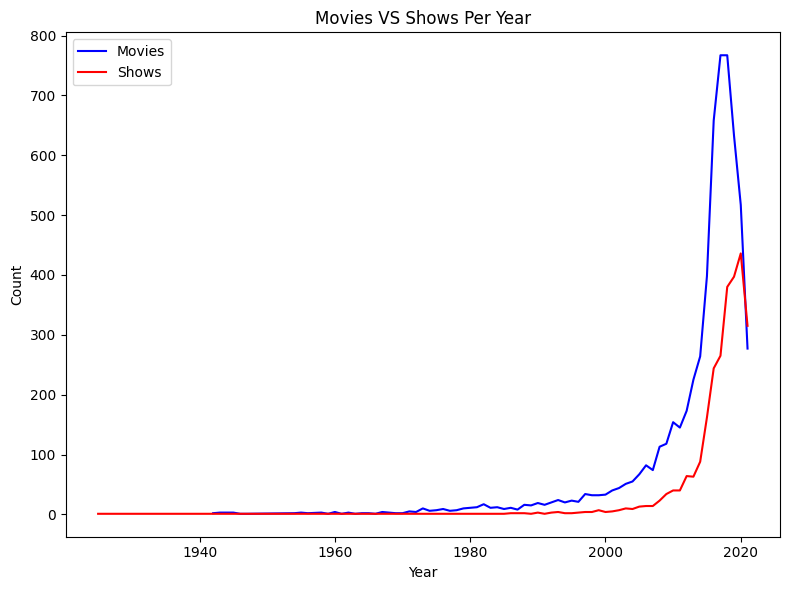

In [38]:
#Counting Movies VS Shows Per Year using Single Plot Chart

movies_per_year = df[df['type'] == 'Movie'].groupby('release_year').size()
shows_per_year = df[df['type'] == 'TV Show'].groupby('release_year').size()

plt.figure(figsize=(8,6))
plt.plot(movies_per_year.index, movies_per_year.values, label='Movies', color='blue')
plt.plot(shows_per_year.index, shows_per_year.values, label='Shows', color='red')
plt.title("Movies VS Shows Per Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.savefig("Movies VS Shows Per Year Line.png")
plt.show()


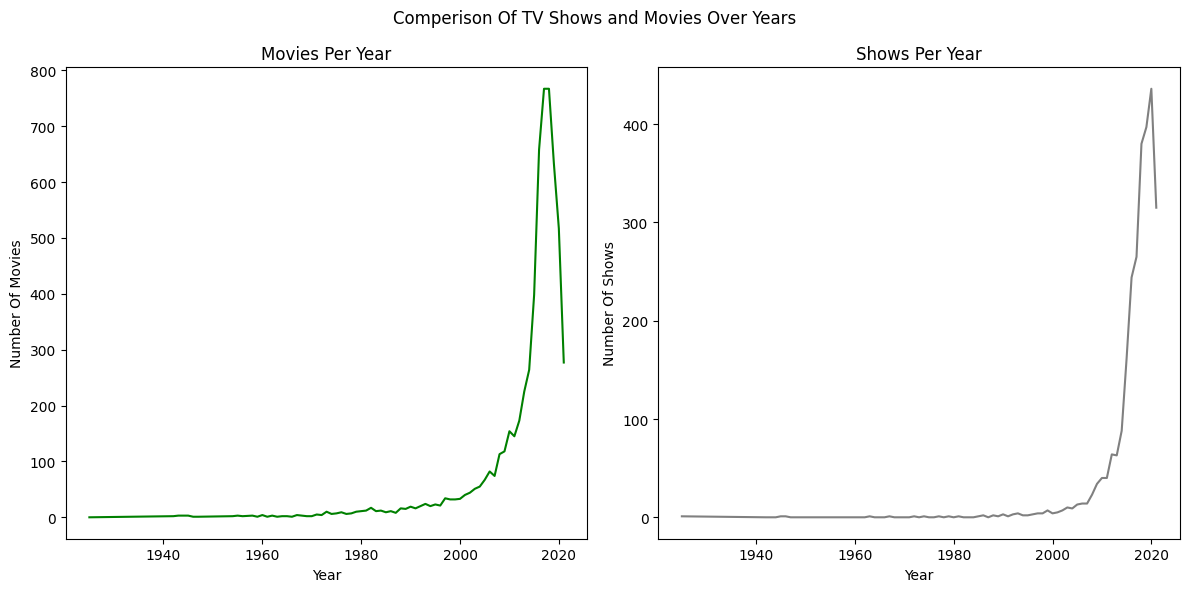

In [41]:
#Counting Movies VS Shows Per Year using subplot

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax= plt.subplots(1,2 ,figsize=(12,6))

#first Subplot for Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'] , color= 'green')
ax[0].set_title('Movies Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number Of Movies')

#Second Subplot for TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color= 'gray')
ax[1].set_title('Shows Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number Of Shows')

plt.suptitle("Comperison Of TV Shows and Movies Over Years")
plt.tight_layout()
plt.savefig("Movies VS Shows Per Year Subplot.png")
plt.show()

In [42]:
df.to_excel('Cleaned Netflix Dataset.xlsx', index=False)
print("Both Visualization and Cleaned Data are done")

Both Visualization and Cleaned Data are done
